# Homework 4: Problems
## Due Wednesday 19 October, by 5pm

### PHYS 440/540, Fall 2022
https://github.com/gtrichards/PHYS_440_540/


## Problem 1

What does the `s6` attribute measure in the `diabetes` dataset (which is built in to Scikit Learn)?


## Problem 2

Practice with faces.  Load the classic Olivetti faces dataset using the `sklearn.datasets.fetch_olivetti_faces()` function.  It contains 400 grayscale 64 × 64–pixel images that are flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each).

Use DESCR to learn about the data set.  Then print a listing of the target values.

Split the data into a training set, a validation set, and a test set.  Make sure to use stratification.  Most of the data should be in the training set, with the test and validation sets being smaller.

Cluster the images using K-means.

Visualize your clusters.


## Problem 3

Use [datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) to generate a fake sample of data.  It should have 100 data points each with 3 attributes/features where the objects are grouped into 4 clusters/groups.  Use `random_state=234567`.

Illustrate with a 2-D plot of two of the attributes.  Show `X` as a 100x3 table of data.  

Do it again in Pandas and give each of the attributes a name.


[Possibly useful or of interest](https://medium.com/dunder-data/from-pandas-to-scikit-learn-a-new-exciting-workflow-e88e2271ef62)


In [1]:
##Problem 1
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

---
#### Problem 2 Starter Code

In [2]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

In [3]:
#Use DESCR to learn about the data set
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [4]:
#View the "targets"
print(olivetti.target)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

In [5]:
#Split the data into a training set, a validation set, and a test set.  Make sure to use stratification.  
#Most of the data should be in the training set, with the test and validation sets being smaller.

from sklearn.model_selection import train_test_split

X = olivetti.data
y = olivetti.target

Xtrainvalid, Xtest, ytrainvalid, ytest = train_test_split(X, y, stratify=y, test_size=.2, random_state=42)
Xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrainvalid, ytrainvalid, stratify=ytrainvalid, test_size=.2, random_state=42)

In [6]:
print(Xtrain.shape,Xvalid.shape,Xtest.shape)

(256, 4096) (64, 4096) (80, 4096)


In [7]:
from sklearn.cluster import KMeans

k_range = range(1, 50, 1)
kmeans_scores = []
kmeans_per_k = []
for k in k_range:

    kmeans = KMeans(n_clusters=k, random_state=42).fit(Xtest)
    kmeans_per_k.append(kmeans)
    
    score = kmeans.score(Xtest)
    kmeans_scores.append(score)
    
    print("k={}, score={}".format(k,score))

C:\Users\evan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=1, score=-6398.8505859375
k=2, score=-5397.17041015625
k=3, score=-4712.87939453125
k=4, score=-4352.29150390625
k=5, score=-4082.6923828125
k=6, score=-3968.4931640625
k=7, score=-3776.12255859375
k=8, score=-3653.47412109375
k=9, score=-3532.434814453125
k=10, score=-3443.020751953125
k=11, score=-3352.704345703125
k=12, score=-3300.792236328125
k=13, score=-3135.037109375
k=14, score=-3048.4267578125
k=15, score=-2968.917236328125
k=16, score=-2828.963623046875
k=17, score=-2775.22412109375
k=18, score=-2603.25634765625
k=19, score=-2574.015625
k=20, score=-2535.442626953125
k=21, score=-2443.355224609375
k=22, score=-2325.17236328125
k=23, score=-2269.1787109375
k=24, score=-2241.5341796875
k=25, score=-2176.846435546875
k=26, score=-2092.535400390625
k=27, score=-2036.9705810546875
k=28, score=-1907.863525390625
k=29, score=-1876.0048828125
k=30, score=-1804.7978515625
k=31, score=-1745.927978515625
k=32, score=-1680.188232421875
k=33, score=-1615.2657470703125
k=34, score=-1557

In [8]:
import numpy as np
best_index = np.argmax(score)
best_model = kmeans_per_k[best_index]
print(kmeans_scores[best_index])

-6398.8505859375


In [14]:
#Nothing for you to fill in here, but try to understand what it is doing
import matplotlib.pyplot as plt

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray", origin='upper')
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = Xtrain[in_cluster]
    labels = ytrain[in_cluster]
    plot_faces(faces, labels)

Cluster 0


IndexError: boolean index did not match indexed array along dimension 0; dimension is 256 but corresponding boolean dimension is 80

---

#### Problem 3 Starter Code

In [1]:
from sklearn import datasets
X,y = datasets.make_blobs(n_samples=100,centers=4,n_features=2,random_state=234567)

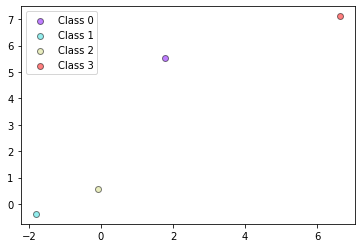

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

plt.figure() #setup plot

#Needed to plot clusters in color according to their labels
y_unique = np.unique(y) 
colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_X = X[y == this_y]
    # Plot the first two columns for all of the objects
    plt.scatter(this_X[0,1], this_X[1,1], c=color[np.newaxis, :],\
                alpha=0.5, edgecolor='k', label="Class %s" % this_y)
    
plt.legend(loc="best")

In [3]:
print(X)

[[  5.77236979  -1.80827993]
 [  5.82962361  -0.37385394]
 [  6.6141483   -1.54426662]
 [  6.93926641   6.63313185]
 [  7.46400564   7.11295247]
 [ -9.03615141   1.77350684]
 [  8.07280111   4.9058182 ]
 [ -9.13699743   5.52412613]
 [  5.84481029  -0.17003704]
 [ -1.09773483  -0.07695468]
 [  6.26711698   3.64668705]
 [  6.26684507   4.48466921]
 [ -7.92308687   2.00145348]
 [-10.05576089  -0.21559111]
 [  6.47254696   6.36550832]
 [  5.26173106   6.0575494 ]
 [  6.12425967   0.59520295]
 [ -0.67158158   0.58099013]
 [ -1.33418557  -0.62071768]
 [ -9.10071064   3.06066131]
 [  5.48108312  -0.5321115 ]
 [ -0.32607508  -0.55935061]
 [ -1.49195733   2.15285593]
 [  7.08825182   5.55502418]
 [ -1.48579829  -1.13028018]
 [ -0.77277746  -1.54591814]
 [ -0.82982359  -1.32360457]
 [  7.38042126   6.53675458]
 [  5.65711059  -1.04436025]
 [  4.35605989  -2.9456902 ]
 [  7.03377876   5.97525133]
 [-10.52477741   2.97121959]
 [  5.85429868  -2.28993028]
 [  5.49532871  -0.6780635 ]
 [ -8.93644456

In [4]:
#Now with Pandas
import pandas as pd
dfX = pd.DataFrame(X)
dfX.columns = ['Ed','Edd']
print(dfX)

           Ed       Edd
0    5.772370 -1.808280
1    5.829624 -0.373854
2    6.614148 -1.544267
3    6.939266  6.633132
4    7.464006  7.112952
..        ...       ...
95 -10.106723  2.934986
96  -7.737123  1.745645
97  -1.757767 -0.798269
98   4.330786 -1.407229
99  -7.396020  2.431610

[100 rows x 2 columns]
